In [127]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV, LeaveOneOut
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut

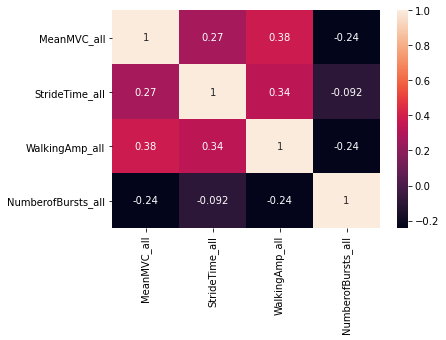

In [250]:
# initial data and correlation plot
data = pd.read_csv('data/QuasiMVCData.csv', index_col='Subject_all')
sn.heatmap(data.corr(), annot=True)
plt.show()

# Linear Regression Models

In [251]:
data

,MeanMVC_all,StrideTime_all,WalkingAmp_all,NumberofBursts_all
Subject_all,,,,
S0001,0.000304,1.159416,0.000040,3
S0003,0.000157,1.238810,0.000012,2
S0005,0.000106,1.007291,0.000023,5
S0010,0.000314,1.161713,0.000027,3
S0014,0.000265,1.345517,0.000259,4
S0015,0.000189,1.045036,0.000030,4
S0016,0.000127,0.901700,0.000023,6
S0017,0.000460,1.169770,0.000027,3
S0021,0.000147,1.072038,0.000024,4


In [281]:
X = data[['StrideTime_all', 'WalkingAmp_all', 'NumberofBursts_all']].values
y = data['MeanMVC_all'].values

In [282]:
# split data and run initial LR model
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
lr = linear_model.LinearRegression().fit(x_train, y_train)
lr.score(x_val, y_val)

-0.07174679708693166

In [283]:
# run Random Forest Regression
rfr = RandomForestRegressor(random_state=3).fit(x_train, y_train)
rfr.score(x_val, y_val)

0.2195267622581497

In [254]:
# run LeaveOneOut with Linear Regression

cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    X_train, X_val = X[train_ix, :], X[test_ix, :]
    y_train, y_val = y[train_ix], y[test_ix]
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_test)
    # store
    y_true.append(y_val[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = r2_score(y_true, y_pred)
print('R2: %.5f' % acc)

R2: -0.55322


In [255]:
# run LeaveOneOut with Random Forest Regression
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, test_ix in cv.split(X):
    X_train, X_val = X[train_ix, :], X[test_ix, :]
    y_train, y_val = y[train_ix], y[test_ix]
    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_val)
    # store
    y_true.append(y_val[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = r2_score(y_true, y_pred)
print('R2: %.5f' % acc)

R2: -0.17849


### 316 data

In [228]:
# New dataset we computed with more stride samples

data_316 = pd.read_csv('data/QuasiMVCData0316.csv')
X = data_316[['StrideTime_all', 'WalkingAmp_all', 'NumberofBursts_all']].values
y = data_316[['MeanMVC_all']].values.ravel()
groups = data_316[['Subject_all']].values.ravel() # create groups for Leave One Group Out

In [231]:
# Split data while keeping groups together
train_idx, test_idx = next(GroupShuffleSplit(n_splits=2, test_size=0.2, random_state=1).split(X, y, groups=groups))

In [236]:
# Train set - use for training and validation
train_data316 = data_316.iloc[train_idx]
#train_data316.to_csv('data/traindata_316.csv')

In [235]:
# Test set. No touchy until done tuning models... 
test_data316 = data_316.iloc[test_idx]
#test_data316.to_csv('data/testdata_316.csv')

In [264]:
train_data316

,Subject_all,MeanMVC_all,StrideTime_all,WalkingAmp_all,NumberofBursts_all
0,1,0.000305,1.108504,0.000024,4
1,1,0.000305,1.119906,0.000035,4
2,1,0.000305,1.077504,0.000033,2
3,1,0.000305,1.055285,0.000023,5
4,1,0.000305,1.080877,0.000028,3
...,...,...,...,...,...
1180,31,0.000472,1.116931,0.000027,5
1181,31,0.000472,1.116417,0.000022,2
1182,31,0.000472,1.119221,0.000037,4
1183,31,0.000472,1.107825,0.000027,5


In [271]:
# Grab features and store as X, y, groups
X = train_data316[['StrideTime_all', 'WalkingAmp_all', 'NumberofBursts_all']].values
y = train_data316[['MeanMVC_all']].values.ravel()
groups = train_data316[['Subject_all']].values.ravel()

In [272]:
# Leave One Out using updated data (Random Forest)
cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, val_ix in cv.split(X):
    X_train, X_val = X[train_ix, :], X[val_ix, :]
    y_train, y_val = y.ravel()[train_ix], y.ravel()[val_ix]
    model = RandomForestRegressor(random_state=1)
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_val)
    # store
    y_true.append(y_val[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = r2_score(y_true, y_pred)
print('R2: %.3f' % acc)

R2: 0.296


Text(0, 0.5, 'predicted values')

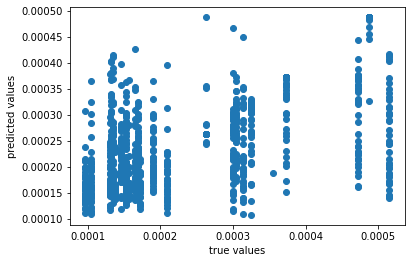

In [273]:
plt.scatter(y_true, y_pred)
plt.xlabel('true values')
plt.ylabel('predicted values')

In [276]:
# Leave One Out using updated data (Linear Regression)

cv = LeaveOneOut()
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, val_ix in cv.split(X):
    X_train, X_val = X[train_ix, :], X[val_ix, :]
    y_train, y_val = y.ravel()[train_ix], y.ravel()[val_ix]
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_val)
    # store
    y_true.append(y_val[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = r2_score(y_true, y_pred)
print('R2: %.3f' % acc)

R2: 0.091


Text(0, 0.5, 'predicted values')

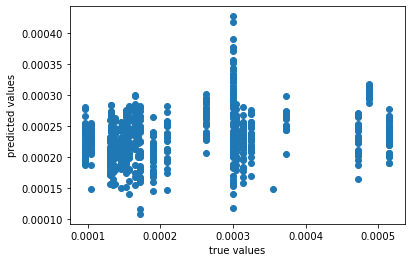

In [277]:
plt.scatter(y_true, y_pred)
plt.xlabel('true values')
plt.ylabel('predicted values')

In [278]:
# Leave One GROUP Out using updated data (Random Forest) 

logo = LeaveOneGroupOut().split(X, y, groups=groups)
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, val_ix in logo:
    X_train, X_val = X[train_ix, :], X[val_ix, :]
    y_train, y_val = y.ravel()[train_ix], y.ravel()[val_ix]
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_val)
    # store
    y_true.append(y_val[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = r2_score(y_true, y_pred)
print('R2: %.3f' % acc)

R2: -5.495


Text(0, 0.5, 'predicted values')

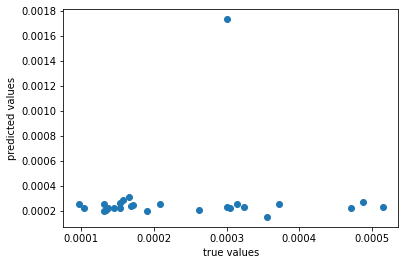

In [279]:
plt.scatter(y_true, y_pred)
plt.xlabel('true values')
plt.ylabel('predicted values')

In [249]:
# Leave One GROUP Out using updated data (Linear Regression) 

logo = LeaveOneGroupOut().split(X, y, groups=groups)
# enumerate splits
y_true, y_pred = list(), list()
for train_ix, val_ix in logo:
    X_train, X_val = X[train_ix, :], X[val_ix, :]
    y_train, y_val = y.ravel()[train_ix], y.ravel()[val_ix]
    model = RandomForestRegressor(random_state=9)
    model.fit(X_train, y_train)
    # evaluate model
    yhat = model.predict(X_val)
    # store
    y_true.append(y_val[0])
    y_pred.append(yhat[0])
# calculate accuracy
acc = r2_score(y_true, y_pred)
print('R2: %.3f' % acc)

R2: -0.285


Text(0, 0.5, 'predicted values')

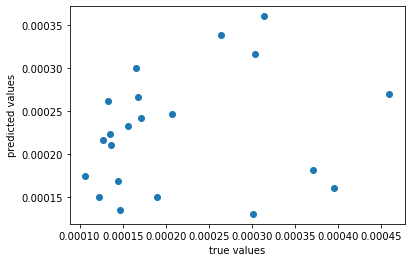

In [270]:
plt.scatter(y_true, y_pred)
plt.xlabel('true values')
plt.ylabel('predicted values')